In [1]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
def mse(pred, target): return ((pred-target**2)).mean()

In [3]:
# Step1: Intitalize the parameters to randon values and tell Pytorch we want to track their gradients, using requires_grad_()

In [4]:
params = torch.randn(3).requires_grad_()

In [5]:
orig_params = params.clone()

In [6]:
print(params)
print(orig_params)

tensor([0.2885, 0.1763, 0.2416], requires_grad=True)
tensor([0.2885, 0.1763, 0.2416], grad_fn=<CloneBackward>)


tensor([69.0481, 55.2013, 46.3463, 32.3571, 24.1420, 17.2349,  5.3553,  4.5748,
         4.5329,  0.2860,  1.5318,  6.6047,  5.3159,  8.1598, 16.6540, 17.2581,
        32.0675, 46.9420, 52.1384, 71.0670])


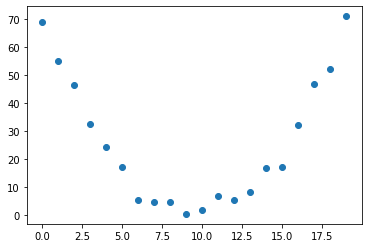

In [7]:
time = torch.arange(0,20).float()
time

speed = torch.randn(20)*3 + 0.75*(time-9.5)**2 + 1
print(speed)
plt.scatter(time,speed);

In [8]:
def f(t, params):
  a,b,c = params
  return a*(t**2) + (b*t) + c

In [9]:
#Step 2: Calculate the predeiction

In [10]:
pred = f(time, params)

In [11]:
def show_preds(pred, ax=None):
  if ax is None:  ax = plt.subplots()[1]
  ax.scatter(time, speed, label='Original')
  ax.scatter(time, pred.detach().numpy(), color='red', label='Predication')
  ax.set_ylim(-300, 100)
  ax.legend()

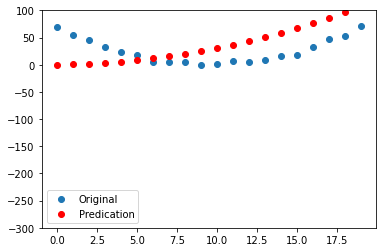

In [12]:
show_preds(pred)

In [13]:
#Step 3: Calculate the loss

In [14]:
loss = mse(pred, speed)
loss

tensor(-1146.2950, grad_fn=<MeanBackward0>)

In [15]:
#Step 4: Calculate the gradient

In [16]:
loss.backward()

In [17]:
params.grad

tensor([123.5000,   9.5000,   1.0000])

In [18]:
params.grad * 1e-5

tensor([1.2350e-03, 9.5000e-05, 1.0000e-05])

In [19]:
params

tensor([0.2885, 0.1763, 0.2416], requires_grad=True)

In [20]:
#Step  5: Step the weights. Update the paramaters based on gradients

In [21]:
lr  = 1e-2
params.data -= lr * params.grad.data
print(params.data)
print(params.grad.data)
params.grad = None

tensor([-0.9465,  0.0813,  0.2316])
tensor([123.5000,   9.5000,   1.0000])


In [22]:
preds = f(time, params)
mse(preds, speed)

tensor(-1299.7297, grad_fn=<MeanBackward0>)

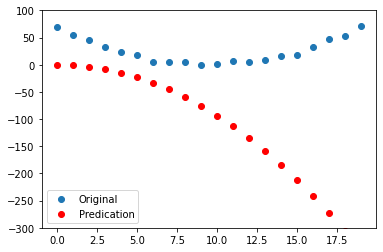

In [23]:
show_preds(preds)

In [24]:
def apply_step(params, prn=True):
  preds = f(time, params)
  loss = mse(preds, speed)
  loss.backward()
  params.data -= lr * params.grad.data
  params.grad = None
  if prn: print(loss.item())
  return preds

In [25]:
#Step 6: Repeat the entire process

In [26]:
for i in range(10): apply_step(params)

-1299.729736328125
-1453.164794921875
-1606.5997314453125
-1760.0347900390625
-1913.469970703125
-2066.90478515625
-2220.33984375
-2373.774658203125
-2527.209716796875
-2680.644287109375


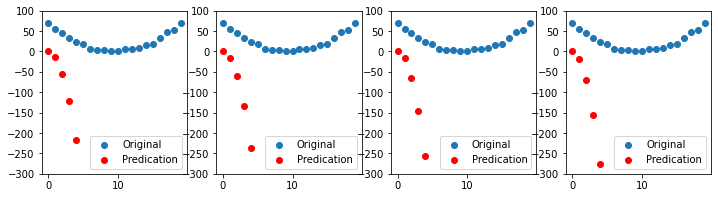

In [27]:
_, axes = plt.subplots(1,4,figsize=(12,3))
for ax in axes: show_preds(apply_step(params, False), ax)